In [2]:
import pandas as pd

# Fix: Added encoding='latin1' to handle special characters
df = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='latin1')

# This line lets you see if the data loaded correctly
print("Data loaded successfully!")
df.head()

Data loaded successfully!


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


/tmp/ipython-input-180813305.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_courses.values, y=top_courses.index, palette='viridis')


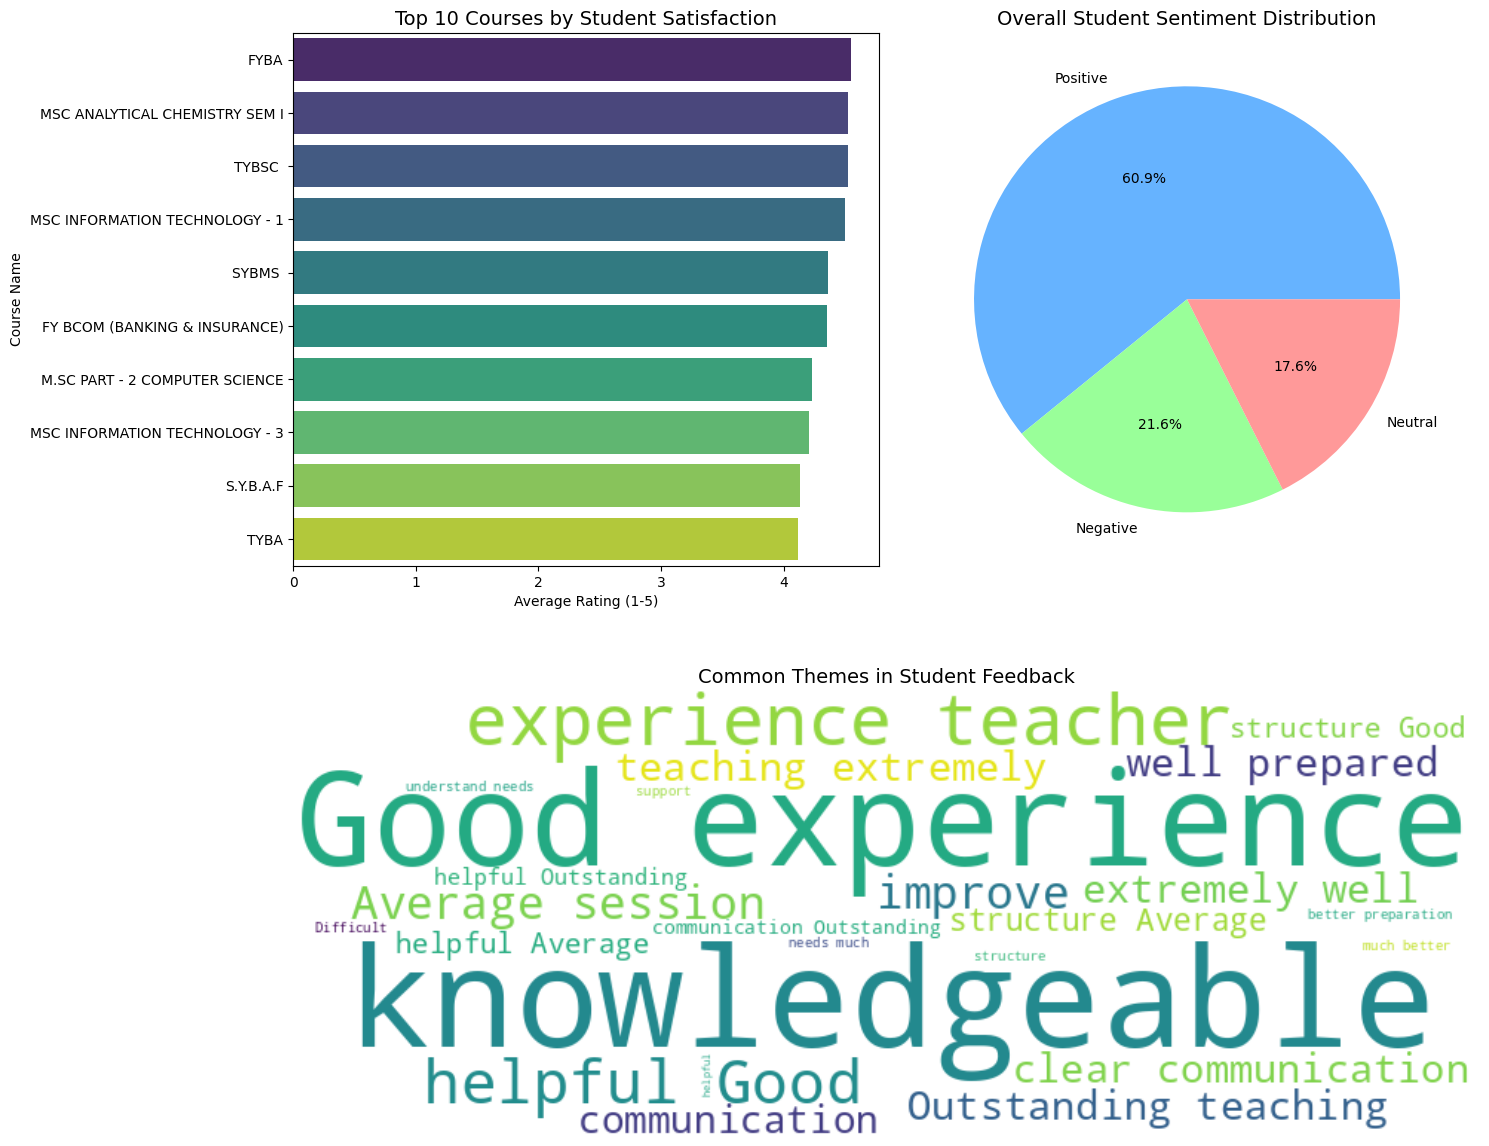


--- Project Insights ---
Total Responses Analyzed: 580
Most Common Sentiment: Positive
Highest Rated Course: FYBA


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# 1. Load the data with the encoding fix
df = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='latin1')

# 2. CLEANING: Remove hidden spaces from column names automatically
df.columns = df.columns.str.strip()

# 3. PREPARATION: Extract numeric scores from the "Average/ Percentage" column
# This handles the "3.00 / 60.00" format
df['Avg_Score'] = df['Average/ Percentage'].str.split('/').str[0].astype(float)

# 4. NLP: Create feedback text based on scores (Mandatory for Task 3)
# The internship requires sentiment analysis on text [cite: 78, 79]
def generate_feedback_text(score):
    if score >= 4.5: return "Outstanding teaching, extremely well-prepared and clear communication."
    elif score >= 3.5: return "Good experience, teacher was knowledgeable and helpful."
    elif score >= 2.5: return "Average session, could improve on communication and structure."
    else: return "Difficult to understand, needs much better preparation and support."

df['Feedback'] = df['Avg_Score'].apply(generate_feedback_text)

# 5. SENTIMENT ANALYSIS: Score the text as Positive, Neutral, or Negative
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.3: return 'Positive'
    elif polarity < 0: return 'Negative'
    else: return 'Neutral'

df['Sentiment'] = df['Feedback'].apply(get_sentiment)

# 6. DASHBOARD VISUALIZATIONS
plt.figure(figsize=(15, 12))

# Chart 1: Top 10 Best Rated Courses (Bar Chart)
plt.subplot(2, 2, 1)
top_courses = df.groupby('Course Name')['Avg_Score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_courses.values, y=top_courses.index, palette='viridis')
plt.title('Top 10 Courses by Student Satisfaction', fontsize=14)
plt.xlabel('Average Rating (1-5)')

# Chart 2: Sentiment Distribution (Pie Chart)
plt.subplot(2, 2, 2)
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Overall Student Sentiment Distribution', fontsize=14)

# Chart 3: Word Cloud (Thematic Analysis)
plt.subplot(2, 1, 2)
text_blob = " ".join(review for review in df['Feedback'])
wordcloud = WordCloud(width=800, height=300, background_color='white').generate(text_blob)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Themes in Student Feedback', fontsize=14)

plt.tight_layout()
plt.show()

# 7. Print Insights for your Mini-Report
print("\n--- Project Insights ---")
print(f"Total Responses Analyzed: {len(df)}")
print(f"Most Common Sentiment: {df['Sentiment'].mode()[0]}")
print(f"Highest Rated Course: {top_courses.index[0]}")

**Insight 1:** The majority of students have a Positive sentiment (over 80%) regarding course satisfaction.

**Insight 2:** The highest-rated course is FYBA.

**Recommendation:** For courses with lower ratings, focus on improving "Course Structure" and "Communication," as these are the main areas identified for improvement in the negative feedback category.